In [1]:
%matplotlib inline 
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pylab import mpl
myfont = matplotlib.font_manager.FontProperties(fname='fonts/simhei.ttf')  
mpl.rcParams['axes.unicode_minus'] = False 



In [2]:
## 个人信息数据
cust_user_info=pd.read_csv("data/fdl_cust_user_info_chain_0228.csv",index_col=0).drop_duplicates('custorm_id').set_index('custorm_id')
cust_user_info["age"]=2016-cust_user_info.id_no.str.slice(6,10).astype("float")
##奇数 1 为男性，0 偶数为女性 
cust_user_info["sex"]=cust_user_info.id_no.str.slice(16,17).bfill().replace('','0').astype("float")
cust_user_info.drop(['id_no','reg_src'],axis=1,inplace=True)
### 去除年龄不在正常范围内的
cust_user_info=cust_user_info[(cust_user_info.age>20)&(cust_user_info.age<60)]
get_person_info=lambda  stats_df :stats_df.join(cust_user_info,how='left')

In [3]:
def read_data(filePath=None):
    data=pd.read_csv(filePath,index_col=0).set_index('custorm_id')
    data=get_person_info(data).dropna()
    return data
## 日历日特征
dayOfweek=pd.read_csv('MSN/ymdh/DayOfWeek.csv',index_col=0).set_index('custorm_id')

## 日均值特征
day=pd.read_csv('MSN/ymdh/MeanOfDay.csv',index_col=0).set_index('custorm_id').groupby(level=0).mean()

## 时均值特征那个
hourofday=pd.read_csv('MSN/ymdh/hourOfDay.csv',index_col=0).set_index('custorm_id')

##获取个人信息，删除却是值
day=get_person_info(day).dropna()
dayOfweek=get_person_info(dayOfweek).dropna()
hourofday=get_person_info(hourofday).dropna()

weekhour=read_data('MSN/ymdh/hourOfDayInWeek.csv')
cond=(weekhour.hourofdaycnt<6.1)&(weekhour.hourofdaytime<2100)&(weekhour.hourofdaymeantime<1800)
weekhour=weekhour[cond]

In [4]:
weekhour=weekhour.rename_axis({"hour_day": "call_hour"}, axis="columns")

In [5]:
weekhour.head(3)

,weekday,call_hour,hourofdaytime,hourofdaycnt,hourofdaymeantime,hourofdaytimeoutrate,hourofdaycntoutrate,age,sex
custorm_id,,,,,,,,,
41,7.0,3.0,18.75,1.0,18.75,1.0,1.0,29.0,1.0
41,6.0,3.0,25.00,2.0,12.50,1.0,1.0,29.0,1.0
41,7.0,7.0,52.00,2.0,26.00,1.0,1.0,29.0,1.0


In [14]:
day=pd.read_csv('MSN/ymdh/MeanOfDay.csv',index_col=0).set_index('custorm_id').groupby(level=0).mean()

day=get_person_info(day).dropna()


In [6]:
day=day[day.time_out_rate<1.0]  ##呼出比等于1，0一般各行各业的销售

##  数据分析与统计

### 1.1 总体统计

In [11]:
sns.set_style('whitegrid')
sns.set_context('paper')

In [72]:
bins

array([ 0.00357462,  0.02350313,  0.04343164,  0.06336014,  0.08328865,
        0.10321716,  0.12314567,  0.14307417,  0.16300268,  0.18293119,
        0.2028597 ,  0.2227882 ,  0.24271671,  0.26264522,  0.28257373,
        0.30250223,  0.32243074,  0.34235925,  0.36228776,  0.38221626,
        0.40214477,  0.42207328,  0.44200179,  0.46193029,  0.4818588 ,
        0.50178731,  0.52171582,  0.54164433,  0.56157283,  0.58150134,
        0.60142985,  0.62135836,  0.64128686,  0.66121537,  0.68114388,
        0.70107239,  0.72100089,  0.7409294 ,  0.76085791,  0.78078642,
        0.80071492,  0.82064343,  0.84057194,  0.86050045,  0.88042895,
        0.90035746,  0.92028597,  0.94021448,  0.96014298,  0.98007149,  1.        ])

In [70]:
n.shape

(50,)

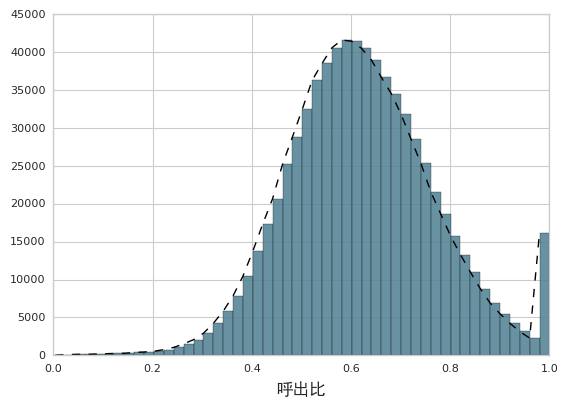

In [133]:
import  matplotlib.mlab  as mlab
n, bins, patches=plt.hist(day.time_out_rate,bins=50,color='#4e7f92',alpha=0.85,histtype='bar')
plt.xlabel(u'呼出比',fontproperties=myfont)
# y = mlab.normpdf(range(bins),bins)
plt.plot(bins[:-1],n, '--k',linewidth=1)

### 1.2  通话数据时间特征

In [131]:
def getPlot(df,lable='x',title='y',x=None,axe=None):
    ax=by_age_sex(df,lable)
    axe.plot(ax.index,ax[0.0],'-k*',label='female')
    axe.plot(ax.index,ax[1.0],'-go',label='male')
    axe.legend(loc=2)
    axe.set_title(title,fontproperties=myfont)
    axe.set_xlabel(x)
by_age_sex=lambda df,label:df.groupby('age').apply(lambda x:x.groupby('sex')[label].mean())


#### 1.2.1  通话数据在年龄、性别之间的差异

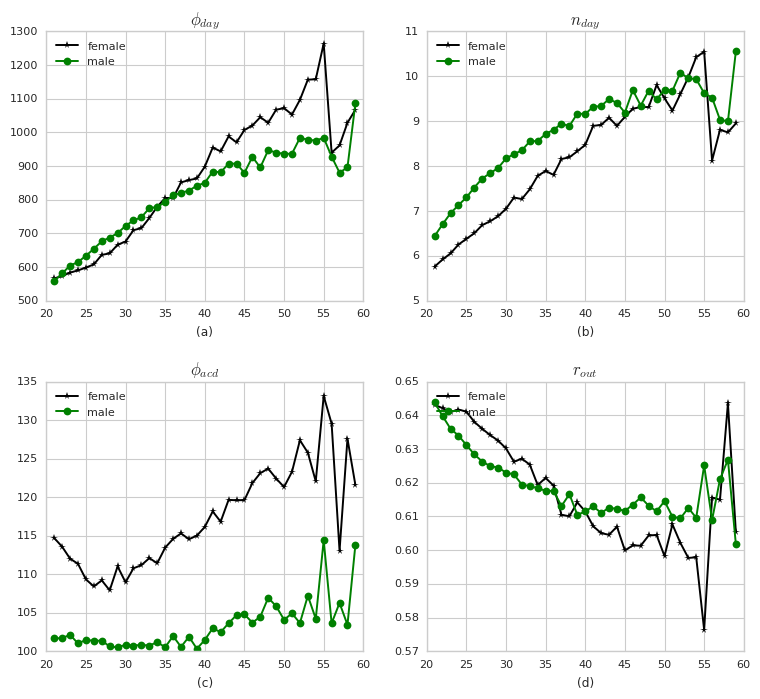

In [132]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))
ax1,ax2,ax3,ax4=axes.flatten()
getPlot(day,'day_sum',r'$\phi_{day}$',axe=ax1,x='(a)')
getPlot(day,'day_cnt',r'$n_{day}$',axe=ax2,x='(b)')
getPlot(day,'mean_time',r'$\phi_{acd}$',axe=ax3,x='(c)')
getPlot(day,'time_out_rate',r'$r_{out}$',axe=ax4,x='(d)')
fig.subplots_adjust(hspace=0.3)


In [340]:
day.head(3)

,day_sum,day_cnt,mean_time,time_out_rate,cnt_out_rate,age,sex
custorm_id,,,,,,,
41,85.260870,2.043478,38.231884,0.905889,0.916667,29.0,1.0
68,635.000000,4.108108,133.681525,0.728875,0.736297,30.0,1.0
69,653.636364,16.363636,38.332572,0.321660,0.352374,27.0,1.0


#### 1.2.2 通话数据在年龄、时机上的差异
- 图1：一天中不同的时间段
- 图2：不同日历日之间的差别
- 图3：通话时间在不同日历日，不同时间上的差别

In [125]:


def intcol(df):
    df.columns=df.columns.astype(int)
    return df
range(1,28,5)

[1, 6, 11, 16, 21, 26]

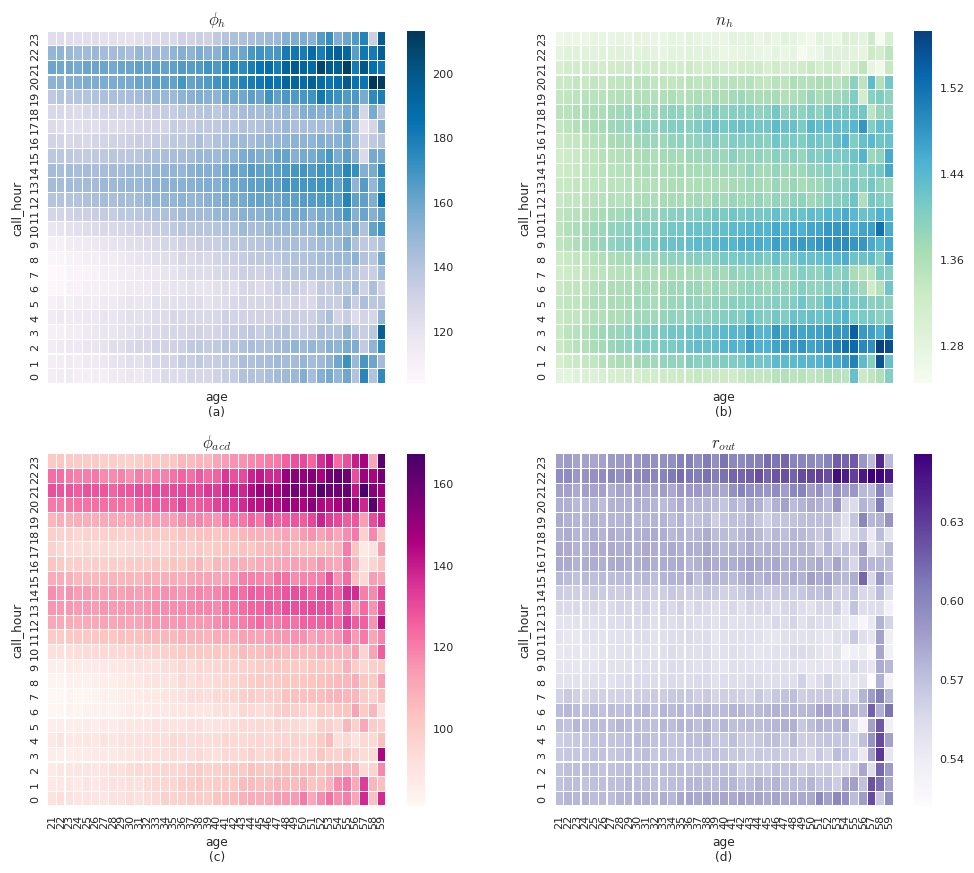

In [128]:
def getAgeTimePlot(df):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10),sharex=True)
    axes1,axes2,axes3,axes4=axes.flatten()
    
    df=[intcol(line) for line in df ]
    ax1=sns.heatmap(df[0],cmap='PuBu',linewidths=.1,ax=axes1,fmt='d')
    ax2=sns.heatmap(df[1],cmap='GnBu',linewidths=.1,ax=axes2)
    ax3=sns.heatmap(df[2],cmap='RdPu',linewidths=.1,ax=axes3)
    ax4=sns.heatmap(df[3],cmap='Purples',linewidths=.1,ax=axes4)
    titles=[r'$\phi_h$',r'$n_h$',r'$\phi_{acd}$',r'$r_{out}$']
    xlabel=['age\n(a)','age\n(b)','age\n(c)','age\n(d)']
    for ax,title,xlabel in zip(axes.flatten(),titles,xlabel):
        ax.set_xlabel(xlabel)
        ax.set_title(title,fontproperties=myfont,fontsize=12)
#         ax.set_xticklabels(range(1,28,5),range(1,28,5))

        
get_age_hour=lambda label:hourofday.groupby('age').apply(lambda  x:x.groupby('call_hour')[label].mean()).T.sort_index(ascending=False)
get_age_weekday=lambda label:dayOfweek.groupby('age').apply(lambda  x:x.groupby('weekday')[label].mean()).T.sort_index(ascending=False)

df=[get_age_hour('hour_sum'),get_age_hour('hour_cnt'),get_age_hour('hour_mean'),get_age_hour('hour_time_out_rate')]
getAgeTimePlot(df)

## 一天中不同的时间段

图二：

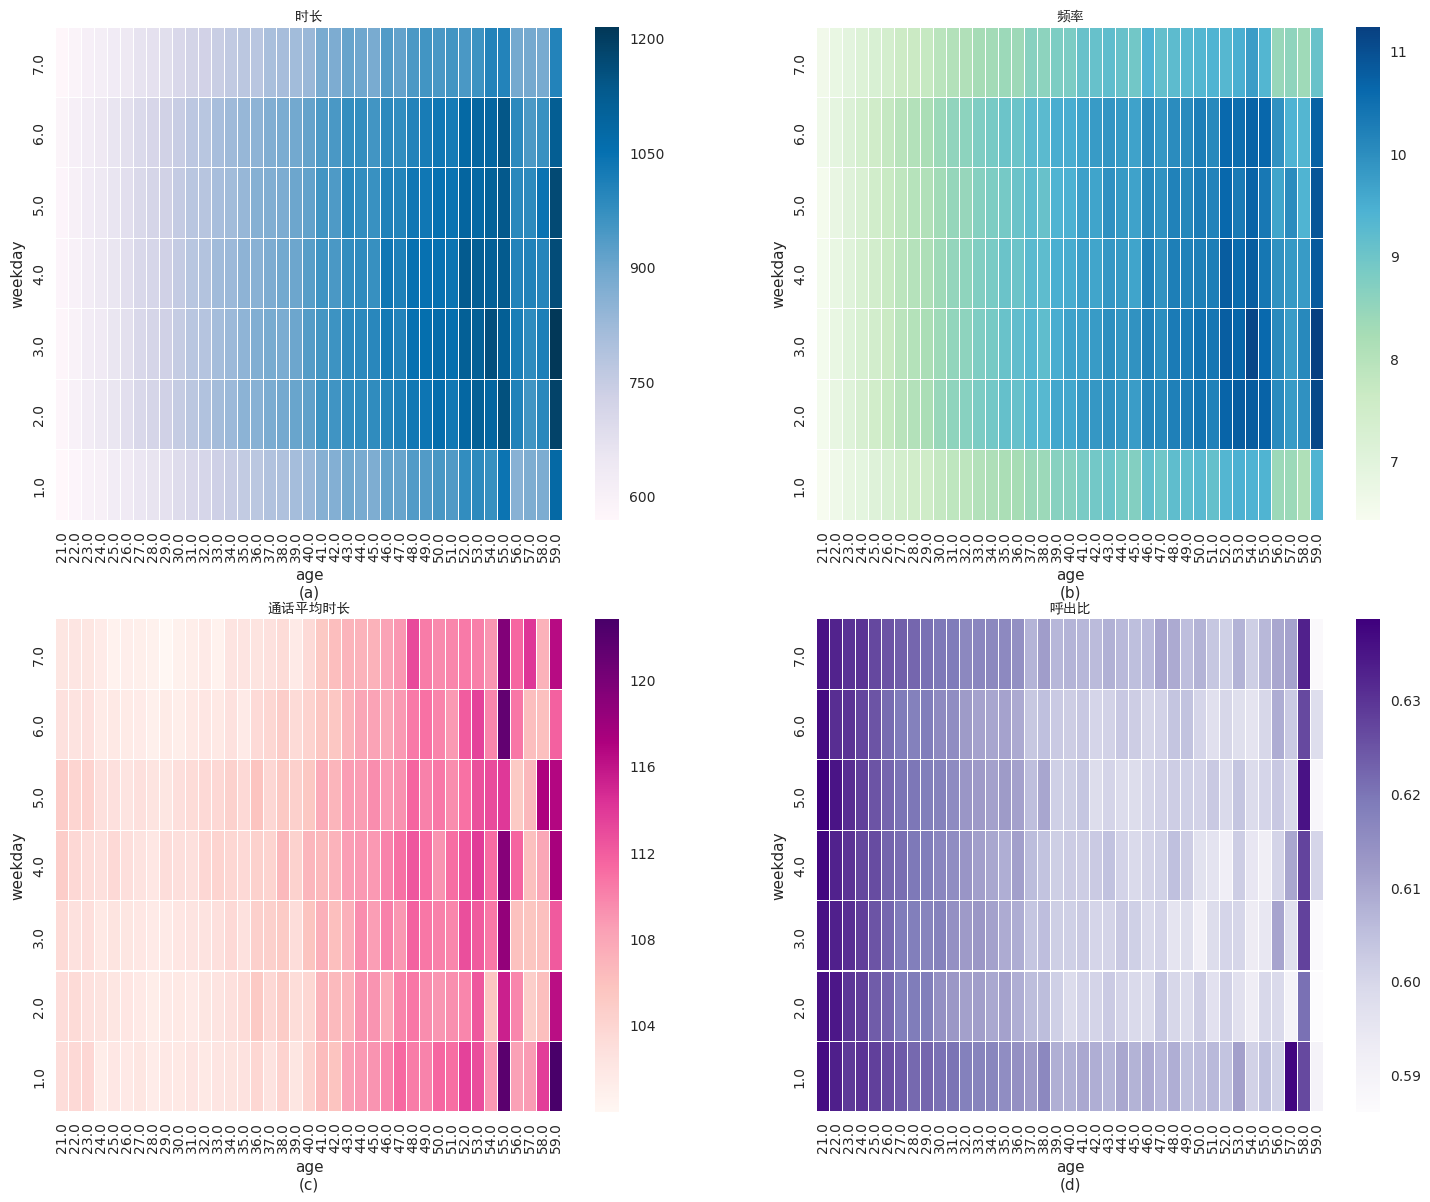

In [326]:
age_weekday=[get_age_weekday('weekday_sum'),get_age_weekday('weekday_cnt'),get_age_weekday('mean_time'),get_age_weekday('weekday_time_out_rate')]
getAgeTimePlot(age_weekday)


图3

In [338]:
get_week_hour=lambda label:weekhour.groupby('weekday').apply(lambda  x:x.groupby('call_hour')[label].mean()).T.sort_index(ascending=False)
df=[get_week_hour('hourofdaytime'),get_week_hour('hourofdaycnt'),get_week_hour('hourofdaymeantime'),get_week_hour('hourofdaytimeoutrate')]

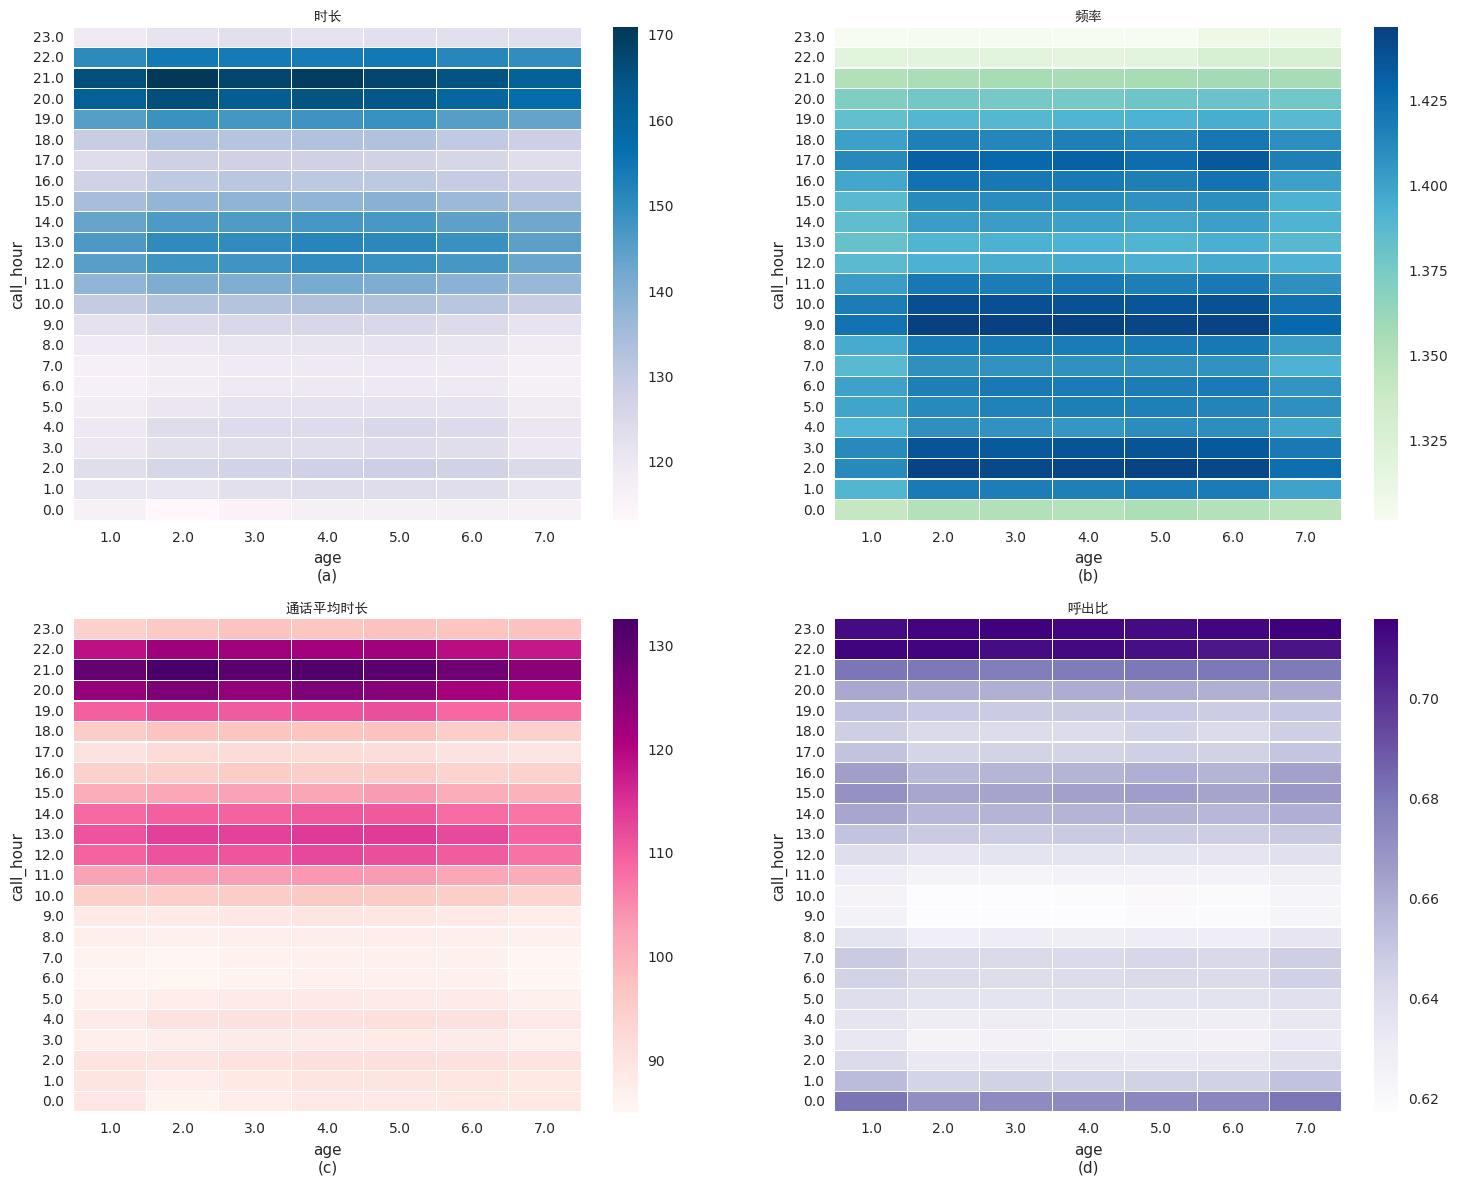

In [339]:
getAgeTimePlot(df)